# 1.) Pull in Data and Convert ot Monthly

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [20]:
# Difference in stockprice
df['Diff'] = df['Adj Close'].diff().shift(-1)

# Target up or down
df['Target'] = np.sign(df['Diff'])

# Option Premium
df['Premium'] = .08 * df['Adj Close']

In [21]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [24]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [25]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [26]:
df['Predictions'] = y_pred

In [27]:
df['Profits'] = 0.

# True Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), 'Profits'] = df['Premium']

# False Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == -1), 'Profits'] = 100 * df['Diff'] + df['Premium']

# True Negatives
# =0

# False Negatives
# =0

# 5.) Plot profits over time

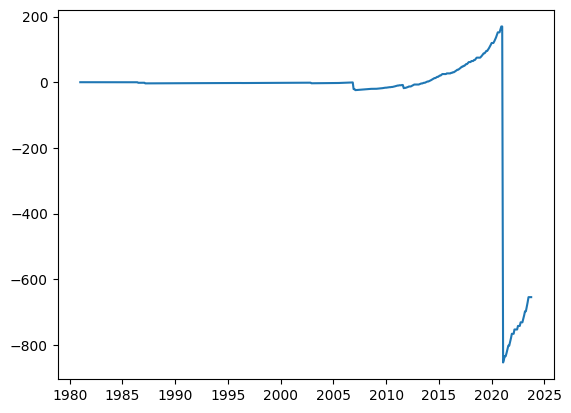

In [28]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

# 5.5) Your skills from the MQE to help Mr. Lius ventures

My analytical skills, refined through UCLA's MQE program and further sharpened by practical internship experiences, stands to be a strategic asset to Philip Liu's company and platform. My proficiency in statistical modeling and predictive analytics, with a special focus on economic data, primes me to extract meaningful insights from the company's strategic development. Furthermore, my understanding of machine learning could inject innovative approaches to advancing the company's intelligent systems and bolstering the robustness of the platform. Such skills are indispensable for nurturing a culture of data-led strategy and propelling forward-thinking breakthroughs in the dynamic industry.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.